

# XGBoost & Hyperparameter tuning


* [1. Loading and Inspecting Data](#2.-Loading-and-Inspecting-Data)
* [2. Data preprocessing](#3.-Data-preprocessing)
* [2.1 Fill NaN values](#3.1-Fill-NaN-values)
* [2.2 Encoding ordinal features](#3.2-Encoding-ordinal-features)
* [2.3 Encode nominal features](#3.3-Encode-nominal-features)
* [3. Feature Engineering](#4.-Feature-Engineering)
* [4. Normalize](#5.-Normalize)
* [5. Fit Models](#6.-Fit-Models)
* [5.1 Base line model](#6.1-Base-line-model)
* [5.2 XGBoost](#6.2-XGBoost)
    * [Parameters](#Parameters)
    * [Tuning the hyper-parameters](#Tuning-the-hyper-parameters)
    * [Best Fit](#Best-Fit)
* [6. Compare Models](#7.-Compare-Models)
* [7. Plot Results](#8.-Plot-Results)
* [8. Predic Test & Submission](#9.-Predic-Test-&-Submission)





<br>Reference:</br>
<br>https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html
<br>https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
<br>https://scikit-learn.org/stable/modules/grid_search.html#multimetric-grid-search
<br>https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
    

# 1. Loading and Inspecting Data

In [1]:
# Import package

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import os

import warnings
warnings.filterwarnings("ignore")

In [2]:
# loading dataset
train = pd.read_csv('houseprices_train.csv')
test = pd.read_csv('houseprices_test.csv')

In [3]:
# Shape 
print('TRAIN %s\n Test %s' % (train.shape,test.shape))

TRAIN (1460, 81)
 Test (1459, 80)


In [4]:
train.shape

(1460, 81)

In [5]:
test.shape

(1459, 80)

we can see that train has one mmore column so we can find out which is our target column

In [6]:
# feature to predict
pred = list(set(train.columns) - set(test.columns))

In [7]:
pred

['SalePrice']

###### we can see here that our target value is salesprice

As we know that we are predicting sales price that means it is regression problems 
So we will use Xgboost regressor for this problem 

SO whenever we are solving regression problem we will use regressor and whenever we are solving classifier we will use classifier 

Each and every library in sklearn provides the details of the classifier and rregressor , the corresponding hyperparameter 

In [8]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [9]:
train.columns.astype('object')

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [10]:
train[pred].describe()

,SalePrice
count,1460.000000
mean,180921.195890
std,79442.502883
min,34900.000000
25%,129975.000000
50%,163000.000000
75%,214000.000000
max,755000.000000


So here we can see that min value is 34900 and max value is 755000
25% is 129975 
50% is 163000
75% 214000

so we can see that max value has great gap so it shows that there are some outliers in sales column

In [11]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


No handles with labels found to put in legend.


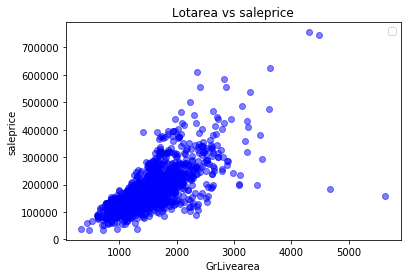

In [12]:
# Plot GrLiveArea vs Salesprice

plt.scatter(train['GrLivArea'], train['SalePrice'],color='blue',alpha=0.5)
plt.title("Lotarea vs saleprice")
plt.legend(loc='best')
plt.xlabel('GrLivearea')
plt.ylabel('saleprice')
plt.show()

Here e can see that living arae and sales has +ve relationship as the livingarea increases the salesprice also increases 

and after a point there are some outliers points 

there are two datapoints which actually do not follow the relationship where the living area is very high but still the price is low so this is something which is unusual in nature and might impact the performance so we might to decide to get rid of these two datapoints which impact the performance of model

# 2. Data preprocessing

<ul>
    <li>First I'll replace the numeric missing values (NaN's) with 0 and non numeric with none.
    <li>Create Dummy variables for the categorical features.
    <li>transform the skewed numeric features by taking log(feature + 1) - this will make the features more normal.
</ul>

## 2.1 Fill NaN values


In [13]:
# save and drop id 
train_id = train['Id']
train.drop(columns='Id', inplace=True)

# id is not important column and it will not impact the prices 


In [14]:
test_id = test['Id']
test.drop(columns='Id', inplace=True)

We have done this type of transformation earlier also but there we combined the training and testing dataset 

So this is the different way of doing it we can perform operations either by combining them or by individually it's up to us 

but if w eare doing individually we have to be more careful 

In [15]:
# sleect Object Column

Obj_col = train.columns[train.dtypes == 'object'].values

In [16]:
# select non object column

num_col =  train.columns[train.dtypes !='object'].values
num_col_test =  test.columns[test.dtypes !='object'].values

In [17]:
# replace null values in object column with None
train[Obj_col] = train[Obj_col].fillna('None')
test[Obj_col] = test[Obj_col].fillna('None')

In [18]:
#replace null value in mueric column iwth 0
train[num_col] = train[num_col].fillna(0)# in train dataframe when num-col has nan it will fill by 0
test[num_col_test] = test[num_col_test].fillna(0)#in train dataframe when num-col has nan it will fill by 0

In [19]:
train_001 = train
test_001 = test

## 2.2 Encoding ordinal features

In [21]:
!pip install --upgrade category_encoders

In [23]:
import category_encoders as ce

#Ordinal features
ordinal_features = ["ExterQual","ExterCond","BsmtQual","BsmtCond","BsmtExposure", "BsmtFinType1","BsmtFinType2",
                    "HeatingQC","Electrical","KitchenQual", "FireplaceQu","GarageQual","GarageCond","PoolQC"]

#Split X,y
train_002_X = train_001.drop(pred, axis=1)
train_002_y = train_001[pred]

ce_one_hot = ce.OrdinalEncoder(cols = ordinal_features)

train_003 = pd.concat([ce_one_hot.fit_transform(train_002_X), train_002_y], axis=1, sort=False)
test_003  = ce_one_hot.transform(test_001)

So now we will convert the ordinal feature 

here are the certain ordinal feature 

we are splitting the data into x and y 

then we create the obj of onehotencoders so in this we are givinig the column name as ordinal feature 
hence these ordinal feature will be converted into ordinalfeature into ordinal column 

then we are doing fir_transform that means we are fitting and transforming also column at the same time 

In [24]:
train_003.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,0,1,None,None,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,...,0,1,None,None,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,...,0,1,None,None,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,...,0,1,None,None,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,...,0,1,None,None,0,12,2008,WD,Normal,250000


In [25]:
test_003.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,None,Reg,Lvl,AllPub,Inside,...,120,0,1,MnPrv,None,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,None,IR1,Lvl,AllPub,Corner,...,0,0,1,None,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,None,IR1,Lvl,AllPub,Inside,...,0,0,1,MnPrv,None,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,None,IR1,Lvl,AllPub,Inside,...,0,0,1,None,None,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,None,IR1,HLS,AllPub,Inside,...,144,0,1,None,None,0,1,2010,WD,Normal


## 2.3 Encode nominal features

In [27]:
#Nominal features
nominal_features = [x for x in Obj_col if x not in ordinal_features]

#Transfer object to int
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

#for loop nominal feature column
for i in train_003[nominal_features].columns:
    #fit and transform each column and assign to itself
    train_003[i] = labelencoder.fit_transform(train_003[i])
    
#for loop nominal feature column
for i in test_003[nominal_features].columns:
    #fit and transform each column and assign to itself
    test_003[i] = labelencoder.fit_transform(test_003[i])
    
#Get dummy variable for nominal features
train_005 = pd.get_dummies(train_003,columns=nominal_features,drop_first=True)
test_005 = pd.get_dummies(test_003,columns=nominal_features,drop_first=True)

now we will convert the nominal feature 
so we have nominal feature which are also called as catagorical feature 
one way of converting catagorical feature is we have used 

1) np.where 

2) astype 

3) if else condition for creating dummy variable 

4) getdummy function 

5) here is another method to convert catagoricalcolumn into numerical column or one-hot-encoding by using labelencoder

In [28]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,...,0,None,None,None,0,12,2008,WD,Normal,250000


In [29]:
test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,None,Reg,Lvl,AllPub,Inside,...,120,0,None,MnPrv,None,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,None,IR1,Lvl,AllPub,Corner,...,0,0,None,None,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,None,IR1,Lvl,AllPub,Inside,...,0,0,None,MnPrv,None,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,None,IR1,Lvl,AllPub,Inside,...,0,0,None,None,None,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,None,IR1,HLS,AllPub,Inside,...,144,0,None,None,None,0,1,2010,WD,Normal


In [30]:
train_003.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,65.0,8450,1,1,3,3,0,4,...,0,1,4,1,0,2,2008,8,4,208500
1,20,3,80.0,9600,1,1,3,3,0,2,...,0,1,4,1,0,5,2007,8,4,181500
2,60,3,68.0,11250,1,1,0,3,0,4,...,0,1,4,1,0,9,2008,8,4,223500
3,70,3,60.0,9550,1,1,0,3,0,0,...,0,1,4,1,0,2,2006,8,0,140000
4,60,3,84.0,14260,1,1,0,3,0,2,...,0,1,4,1,0,12,2008,8,4,250000


here we can see that cataegories are converted into numbers 

In [31]:
#Only for test set
#Check if any null values
print(train_005.isnull().any().sum())
print(test_005.isnull().any().sum())

#Get missing columns in the training test
missing_cols = set(train_005.drop(columns="SalePrice").columns) - set(test_005.columns)

#Add a missing column in test set with default value equal to 0
for cols in missing_cols:
    test_005[cols] = 0
    
#Ensure the order of column in the test set is in the same order than in train set
test_005 = test_005[train_005.drop(columns="SalePrice").columns]

0
0


In [32]:
train_005.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,...,SaleType_4,SaleType_5,SaleType_6,SaleType_7,SaleType_8,SaleCondition_1,SaleCondition_2,SaleCondition_3,SaleCondition_4,SaleCondition_5
0,60,65.0,8450,7,5,2003,2003,196.0,1,1,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,2,1,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,1,1,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,2,1,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,1,1,...,0,0,0,0,1,0,0,0,1,0


Now we will applying feature enginerring 

That is we are generating new columns because we will hav eto create new columns to find out relationship 

In [34]:
# 3. Feature Engineering

In [33]:


#TotalBath
train_005['TotalBath'] = (train_005['FullBath'] + train_005['HalfBath'] + train_005['BsmtFullBath'] + train_005['BsmtHalfBath'])
test_005['TotalBath']  = (test_005['FullBath']  + test_005['HalfBath']  + test_005['BsmtFullBath']  + test_005['BsmtHalfBath'])

#TotalPorch
train_005['TotalPorch'] = (train_005['OpenPorchSF'] + train_005['3SsnPorch'] + train_005['EnclosedPorch'] + train_005['ScreenPorch'] + train_005['WoodDeckSF'])
test_005['TotalPorch']  = (test_005['OpenPorchSF']  + test_005['3SsnPorch']  + test_005['EnclosedPorch']  + test_005['ScreenPorch']    + test_005['WoodDeckSF'])

#Modeling happen during the sale year
train_005["RecentRemodel"] = (train_005["YearRemodAdd"] == train_005["YrSold"]) * 1
test_005["RecentRemodel"]  = (test_005["YearRemodAdd"]  == test_005["YrSold"]) * 1

#House sold in the year it was built
train_005["NewHouse"] = (train_005["YearBuilt"] == train_005["YrSold"]) * 1
test_005["NewHouse"]  = (test_005["YearBuilt"]  == test_005["YrSold"]) * 1

#HasPool
train_005['HasPool'] = train_005['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
test_005['HasPool']  = test_005['PoolArea'].apply(lambda x: 1 if x > 0 else 0)

#HasFireplaces
train_005['HasFirePlace'] = train_005['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)
test_005['HasFirePlace']  = test_005['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

#Has2ndFloor
train_005['Has2ndFloor'] = train_005['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
test_005['Has2ndFloor']  = test_005['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)

#HasGarage
train_005['HasGarage'] = train_005['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
test_005['HasGarage']  = test_005['GarageArea'].apply(lambda x: 1 if x > 0 else 0)

#HasBsmnt
train_005['HasBsmnt'] = train_005['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
test_005['HasBsmnt']  = test_005['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)

In [35]:
# next we will fit the model 

# 5. Fit Models

In [36]:
#Importing packages
from sklearn.model_selection import train_test_split

X = train_005.drop(columns="SalePrice")
y = train_005["SalePrice"]


X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.25,random_state=0)

In [37]:
X_train.shape, X_val.shape

((1095, 222), (365, 222))

In [39]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [40]:
#Importing Packages
import matplotlib.pyplot as plt

from xgboost import XGBRegressor
from xgboost import XGBRFRegressor
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.preprocessing import Imputer

### Parameters

<b>Default parameters</b>
<br>max_depth=3, learning_rate=0.1, n_estimators=100, verbosity=1, silent=None, objective='reg:squarederror', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, colsample_bynode=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, importance_type='gain'

*Explanation of relevant parameters for this kernel.*


* **booster:** Select the type of model to run at each iteration
    * gbtree: tree-based models
    * gblinear: linear models
* **nthread:** default to maximum number of threads available if not set
* **objective:** This defines the loss function to be minimized

**Parameters for controlling speed**

* **subsample:** Denotes the fraction of observations to be randomly samples for each tree
* **colsample_bytree:** Subsample ratio of columns when constructing each tree.
* **n_estimators:**  Number of trees to fit.

**Important parameters which control overfiting**

* **learning_rate:** Makes the model more robust by shrinking the weights on each step
* **max_depth:** The maximum depth of a tree.
* **min_child_weight:** Defines the minimum sum of weights of all observations required in a child.

### Tuning the hyper-parameters

**GridSearchCV params:**
* **estimator:** estimator object
* **param_grid :** dict or list of dictionaries
* **scoring:** A single string or a callable to evaluate the predictions on the test set. If None, the estimator’s score method is used.
    * https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
* **n_jobs:** Number of jobs to run in parallel. None means. -1 means using all processors.
* **cv:** cross-validation, None, to use the default 3-fold cross validation. Integer, to specify the number of folds in a (Stratified)KFold.

In [44]:
#XGBoost hyper-parameter tuning
def hyperParameterTuning(X_train, y_train):
    param_tuning = {
        'learning_rate': [0.01,0.1],
        'max_depth': [3, 5, 7, 10],
        #'min_child_weight': [1, 3, 5],
        #'subsample': [0.5, 0.7],
        #'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [100, 200, 500,700,1000,1500],
        'objective': ['reg:squarederror']
    }

    xgb_model = XGBRegressor()

    gsearch = GridSearchCV(estimator = xgb_model,
                           param_grid = param_tuning,                        
                           #scoring = 'neg_mean_absolute_error', #MAE
                           #scoring = 'neg_mean_squared_error',  #MSE
                           cv = 5,
                           n_jobs = -1,
                           verbose = 1)

    gsearch.fit(X_train,y_train)

    return gsearch.best_params_

while running our model or while running gridsearchcv when we have training with small number of parameters it is completely fine but when we are training with a huge number of parameters then it might become difficult for us 

So what we can do is there is no particular level of hyperparametr that one parameter is more important another is less importnat  and there is nothing like which hyperparameter is trained first or lait 

so keeping this in mind we can not train some hyperparameter 

and try with some parameter only then we get the best value for that hyperparameter we will update that value there 

and will search for the best value sof other parameter 

so it will help us reducing training time 

In [45]:
#Run only in the first run of the kernel.
#hyperParameterTuning(X_train, y_train)

### Best Params
{'colsample_bytree': 0.7,
 'learning_rate': 0.01,
 'max_depth': 10,
 'min_child_weight': 5,
 'n_estimators': 500,
 'subsample': 0.5}

In [46]:
### Best Fit

In [47]:
xgb_model = XGBRegressor(
        objective = 'reg:squarederror',
        colsample_bytree = 0.5,
        learning_rate = 0.05,
        max_depth = 6,
        min_child_weight = 1,
        n_estimators = 1000,
        subsample = 0.7)

%time xgb_model.fit(X_train, y_train, early_stopping_rounds=5, eval_set=[(X_val, y_val)], verbose=False)

y_pred_xgb = xgb_model.predict(X_val)

mae_xgb = mean_absolute_error(y_val, y_pred_xgb)

print("MAE: ", mae_xgb)

Wall time: 1.93 s
MAE:  15689.965646404109


# 7. Plot Results

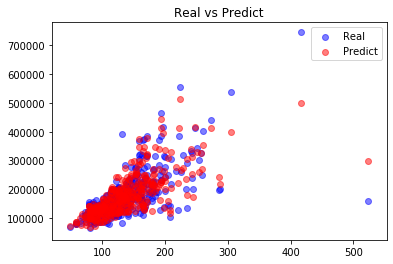

In [49]:
#Plot Real vs Predict
plt.scatter(X_val['GrLivArea'] * 0.092903, y_val,          color='blue', label='Real',    alpha=0.5)
plt.scatter(X_val['GrLivArea'] * 0.092903, y_pred_xgb,  color='red' , label='Predict', alpha=0.5)
plt.title("Real vs Predict")
plt.legend(loc='best')
plt.show()

Blue one are the real values and red ones are the predicted values 

# 8. Predic Test & Submission

In [50]:
X_test = test_005

# Use the model to make predictions
y_pred_test = xgb_model.predict(X_test)

submission = pd.DataFrame({'Id':test_id,'SalePrice':y_pred_test})

# Save results
submission.to_csv("submission.csv",index=False)